In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


unzip:  cannot find or open https://github.com/TheSSJ2612/Real-Time-Medical-Mask-Detection/releases/download/v0.1/Dataset.zip, https://github.com/TheSSJ2612/Real-Time-Medical-Mask-Detection/releases/download/v0.1/Dataset.zip.zip or https://github.com/TheSSJ2612/Real-Time-Medical-Mask-Detection/releases/download/v0.1/Dataset.zip.ZIP.


In [ ]:
#!ls "/content/gdrive/My Drive"
#%cd /content/gdrive/My Drive/Colab Notebooks/   #bring stuff to this kinda folder
%cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [ ]:
%cd basepaper_project/

/content/gdrive/My Drive/basepaper_project


In [ ]:
!ls dataset/with_mask | wc -l

5531


In [ ]:
!ls dataset/without_mask | wc -l

5291


In [ ]:
import os
CWD_PATH = os.getcwd()
print(CWD_PATH)

/content/gdrive/My Drive/basepaper_project


In [ ]:
import tensorflow as tf
device_name=tf.test.gpu_device_name()
print('found gpu at {}'.format(device_name))

found gpu at 


In [ ]:
!pip install tf-nightly
#with tf.device('/gpu:0'):

In [ ]:
#train_mask_detector.py

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [ ]:
import random

In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32
n = 1000

In [ ]:
#  TO LOAD AND PREPROCESS TRAINING DATASET
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
#imagePaths = list(paths.list_images(args["dataset"]))
imagePaths1 = list(paths.list_images('dataset/with_mask'))
imagePaths = random.sample(imagePaths1, n)
imagePaths2 = list(paths.list_images('dataset/without_mask'))
imagePathswo = random.sample(imagePaths2, n)
imagePaths.extend(imagePathswo)
print(imagePaths)

[INFO] loading images...
['dataset/with_mask/1820.jpg', 'dataset/with_mask/8.jpg', 'dataset/with_mask/3081.jpg', 'dataset/with_mask/5219.jpg', 'dataset/with_mask/565.jpg', 'dataset/with_mask/1853.jpg', 'dataset/with_mask/2428.jpg', 'dataset/with_mask/4802.jpg', 'dataset/with_mask/47.jpg', 'dataset/with_mask/2695.jpg', 'dataset/with_mask/3889.jpg', 'dataset/with_mask/895.jpg', 'dataset/with_mask/3228.jpg', 'dataset/with_mask/5175.jpg', 'dataset/with_mask/1343.jpg', 'dataset/with_mask/1742.jpg', 'dataset/with_mask/702.jpg', 'dataset/with_mask/1902.jpg', 'dataset/with_mask/5184.jpg', 'dataset/with_mask/2422.jpg', 'dataset/with_mask/5462.jpg', 'dataset/with_mask/4054.jpg', 'dataset/with_mask/1715.jpg', 'dataset/with_mask/579.jpg', 'dataset/with_mask/4926.jpg', 'dataset/with_mask/1341.jpg', 'dataset/with_mask/4699.jpg', 'dataset/with_mask/1373.jpg', 'dataset/with_mask/3416.jpg', 'dataset/with_mask/491.jpg', 'dataset/with_mask/3872.jpg', 'dataset/with_mask/2853.jpg', 'dataset/with_mask/5437.

In [ ]:
print(len(imagePaths))

2000


In [ ]:
data = []
labels = []
# loop over the image paths
for i,imagePath in enumerate(imagePaths):
	# extract the class label from the filename
  if i % 500 ==0:
    print(i)
  label = imagePath.split(os.path.sep)[-2]
  # load the input image (224x224) and preprocess it
  image = load_img(imagePath, target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  # update the data and labels lists, respectively
  data.append(image)
  labels.append(label)
# convert the data and labels to NumPy arrays

0
500
1000
1500


In [ ]:
data = np.asarray(data, dtype="float32")
labels = np.asarray(labels)

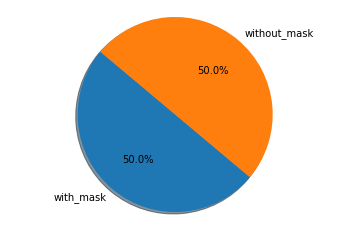

In [ ]:
# Visualizing the percentage of each Gender in target class using pie chart
import matplotlib.pyplot as plt
sizes = [n,n]
plt.pie(sizes, labels=np.unique(labels),autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()
#fig, axs = plt.subplots(1,1,figsize=(14,7))
#labels.value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%')
#axs.set_title("Percentage of each Class")
#plt.show()

In [ ]:
from numpy import save
save('data.npy', data)
save('labels.npy', labels)

In [ ]:
'''
from numpy import savetxt
savetxt('data.csv', data, delimiter=',')
savetxt('labels.csv', labels, delimiter=',')
#from numpy import loadtxt or load
#data = loadtxt('data.csv', delimiter=',')
from numpy import save
save('data.npy', data)
save('labels.npy', labels)
#data = load('data.npy')'''

"\nfrom numpy import savetxt\nsavetxt('data.csv', data, delimiter=',')\nsavetxt('labels.csv', labels, delimiter=',')\n#from numpy import loadtxt or load\n#data = loadtxt('data.csv', delimiter=',')\nfrom numpy import save\nsave('data.npy', data)\nsave('labels.npy', labels)\n#data = load('data.npy')"

In [ ]:
from numpy import savez_compressed
savez_compressed('data.npz', data)
savez_compressed('labels.npz', labels)
#dict_data = load('data.npz')

In [ ]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [ ]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
testY[:3]

array([[0],
       [0],
       [1]])

In [ ]:
labels.shape

(2000, 2)

In [ ]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

In [ ]:
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...
Epoch 1/20
50/50 [==============================] - 80s 2s/step - loss: 0.7198 - accuracy: 0.6161 - val_loss: 0.2788 - val_accuracy: 0.9575
Epoch 2/20
50/50 [==============================] - 76s 2s/step - loss: 0.2743 - accuracy: 0.9360 - val_loss: 0.1478 - val_accuracy: 0.9650
Epoch 3/20
50/50 [==============================] - 76s 2s/step - loss: 0.1495 - accuracy: 0.9698 - val_loss: 0.1026 - val_accuracy: 0.9750
Epoch 4/20
50/50 [==============================] - 76s 2s/step - loss: 0.1108 - accuracy: 0.9751 - val_loss: 0.0803 - val_accuracy: 0.9800
Epoch 5/20
50/50 [==============================] - 76s 2s/step - loss: 0.0911 - accuracy: 0.9770 - val_loss: 0.0651 - val_accuracy: 0.9825
Epoch 6/20
50/50 [==============================] - 76s 2s/step - loss: 0.0804 - accuracy: 0.9809 - val_loss: 0.0588 - val_accuracy: 0.9850
Epoch 7/20
50/50 [==============================] - 76s 2s/step - loss: 0.0727 - accuracy: 0.9744 - val_loss: 

In [ ]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save('mask_detector', save_format="h5")

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       200
without_mask       0.99      0.98      0.99       200

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

[INFO] saving mask detector model...


In [ ]:
# Import confusion_matrix to construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
# Construct the Confusion Matrix using Predicted Target and Actual Test data Target
lab=[0,1]
cm = confusion_matrix(testY.argmax(axis=1), predIdxs, lab)
print(cm)

[[199   1]
 [  3 197]]


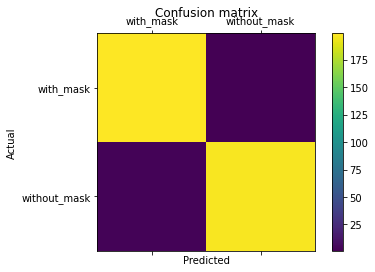

In [ ]:
# Show confusion matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
lab=['with_mask','without_mask']
ax.set_xticklabels([''] + lab)
ax.set_yticklabels([''] + lab)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

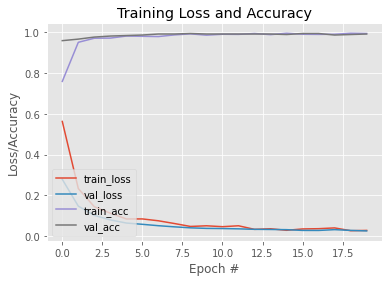

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('plot.png')

### Detect Mask Image

Run first 3 cells - to connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!ls "/content/gdrive/My Drive"
#%cd /content/gdrive/My Drive/Colab Notebooks/   #bring stuff to this kinda folder
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
%cd basepaper_project/

/content/gdrive/MyDrive/basepaper_project


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
print("[INFO] loading face detector model...")
#SSD model
prototxtPath = os.path.sep.join(['face_detector','deploy.prototxt.txt'])
weightsPath = os.path.sep.join(['face_detector/','res10_300x300_ssd_iter_140000.caffemodel'])
net = cv2.dnn.readNet(prototxtPath, weightsPath)

[INFO] loading face detector model...


In [ ]:
CWD_PATH = os.getcwd()
print(CWD_PATH)

/content/gdrive/My Drive/basepaper_project


In [ ]:
# load the face mask detector model from disk
print("[INFO] loading face mask detector model...")
model = load_model('mask_detector.model')

[INFO] loading face mask detector model...


In [ ]:
args={"confidence":0.6, "image_path_cam":'examples/example1.jpg'} # to filter weak detections

In [ ]:
print(args["image_path_cam"])

examples/example1.jpg


In [ ]:
# load the input image from disk, clone it, and grab the image spatial
# dimensions
#image = cv2.imread(args["image"])
#image = cv2.imread(args["image_path_cam"])
image = cv2.imread('examples3/example2.jpg')
orig = image.copy()
(h, w) = image.shape[:2]
# construct a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))
# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing face detections...


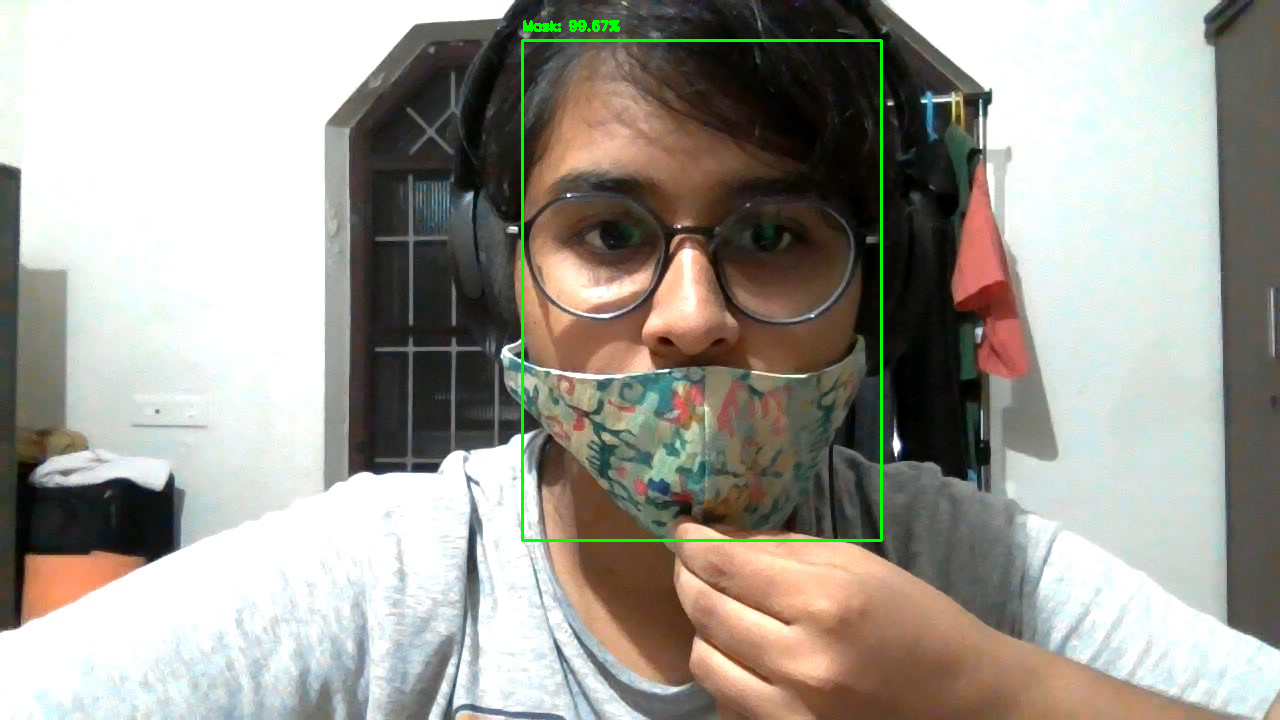

-1

In [ ]:
# loop over the detections
for i in range(0, detections.shape[2]):
  # extract the confidence (i.e., probability) associated with	# the detection
  confidence = detections[0, 0, i, 2]
  # filter out weak detections by ensuring the confidence is
  # greater than the minimum confidence
  if confidence > args["confidence"]:
    # compute the (x, y)-coordinates of the bounding box for the object
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    # ensure the bounding boxes fall within the dimensions of
    # the frame
    (startX, startY) = (max(0, startX), max(0, startY))
    (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
    
    # extract the face ROI, convert it from BGR to RGB channel
		# ordering, resize it to 224x224, and preprocess it
    face = image[startY:endY, startX:endX]
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face = cv2.resize(face, (224, 224))
    face = img_to_array(face)
    face = preprocess_input(face)
    face = np.expand_dims(face, axis=0)
    # pass the face through the model to determine if the face
    # has a mask or not
    (mask, withoutMask) = model.predict(face)[0]
    # determine the class label and color we'll use to draw
    # the bounding box and text
    label = "Mask" if mask > withoutMask else "No Mask"
    color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
    # include the probability in the label
    label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
    # display the label and bounding box rectangle on the output
    # frame
    cv2.putText(image, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
    cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
# show the output image
cv2_imshow(image)
cv2.waitKey(0)

Video


In [ ]:
#check webcam code

Real Time
